<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Linear-Regression-Using-Normal-Equation" data-toc-modified-id="Linear-Regression-Using-Normal-Equation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Regression Using Normal Equation</a></span><ul class="toc-item"><li><span><a href="#Math-behind-Linear-Regression" data-toc-modified-id="Math-behind-Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Math behind Linear Regression</a></span></li><li><span><a href="#The-Normal-Equation" data-toc-modified-id="The-Normal-Equation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The Normal Equation</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Batch Gradient Descent</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Learning-Schedule" data-toc-modified-id="Learning-Schedule-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Learning Schedule</a></span></li></ul></li><li><span><a href="#Mini-batch-Gradient-Descent" data-toc-modified-id="Mini-batch-Gradient-Descent-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mini-batch Gradient Descent</a></span></li></ul></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Polynomial Regression</a></span><ul class="toc-item"><li><span><a href="#Application-using-SciKit---Learn" data-toc-modified-id="Application-using-SciKit---Learn-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Application using SciKit - Learn</a></span></li><li><span><a href="#Learning-Curves" data-toc-modified-id="Learning-Curves-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Learning Curves</a></span></li><li><span><a href="#The-Biase/Variance-Tradeoff" data-toc-modified-id="The-Biase/Variance-Tradeoff-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>The Biase/Variance Tradeoff</a></span></li></ul></li><li><span><a href="#Regularized-Linear-Models" data-toc-modified-id="Regularized-Linear-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regularized Linear Models</a></span><ul class="toc-item"><li><span><a href="#Ride-Regression" data-toc-modified-id="Ride-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ride Regression</a></span></li></ul></li></ul></div>

## Setup

Similar setup to previous chapter, making sure that notebook works in Python 2 & 3 and ensure MatpotLib plotting figures in line and prepare a function to save figures. <br>
Also there are a lot of maths in this chapter :)

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "figures"
CHAPTER_ID = "training_linear_models"
FIG_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)

def save_fig(fig_id, tight_layout = True):
    if not os.path.isdir(FIG_PATH):
        os.makedirs(FIG_PATH)
    fig_path = os.path.join(FIG_PATH, fig_id + '.png') # save as png file
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_path, format = 'png', dpi = 300)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Overview
In this chapter, we will start by looking at linear regression model in two different ways to train it: <br>
- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set)
- Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will also look at a few variants of Gradient Descent that we will use again and again when we study neural networks in Part II: Batch GD, Mini-batch GD, and Stochastic GD.

We'll also talk about: <br>
- Polynomial Regression, a more complex model that can fit non-linear datasets.
- Two more models that are commonly used for classification tasks:
    1. Logistic Regression
    2. Softmax Regression

## Linear Regression Using Normal Equation

### Math behind Linear Regression
Generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called _bias_ (also called _intercept_) as shown below: <br>
$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n $$ <br>

where: <br>
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^\text{th}$ feature value
- $\theta_j$ is the $j^\text{th}$ model parameter (including the bias term $\theta_0$ and the feature weights ( $\theta_1, \theta_2,\ldots,\theta_n$ )

This can be written in a more concisely using __vectorized form__ : <br>
$$\hat{y} = h_\theta(\mathbf{x}) = \theta^T\cdot \mathbf{x}$$

where:
- $\theta$ is the model's _parameter vector_, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$
- $\theta^T$ is the transpose of $\theta$ (i.e., a row vector instead of a column vector)
- $\mathbf{x}$ is the instance's _feature vector_, containing $x_0$ to $x_n$, with $x_0$ always equal to 1
- $\theta^T\cdot\mathbf{x}$ is the dot product of $\theta^T$ and $\mathbf{x}$
- $h_0$ is the hypothesis function, using the model parameters $\theta$

Now we just need to find a measure of how well (or poorly) our model fits the training data. One of the most common performance measure of a regression model is RMSE (Root Mean Square Error). In practice, it is simpler to minimize the MSE (Mean Square Error) than RMSE, and it leads to the sample result. The MSE can be calculated as below:
<br>
$$ MSE(\mathbf{x}, h_\theta) = \frac{1}{m}\sum_{i=1}^m(\theta^T\cdot\mathbf{x}^\text{(i)}- y^\text{(i)})^2 $$

Notations for MSE/RMSE equation ( _using housing price example in Chapter 2_ ) : <br>
- $m$ is the number of instances in the dataset you are measuring MSE/RMSE on
    - e.g., if your are evaluating the RMSE on a validation set of 2,000 districts, then $m = 2000$.
<br>
<br>
- $x^\text{(i)}$ is a vector of all the feature values (excluding the label) of the $i^\text{th}$ instance in the dataset, and $y^\text{(i)}$ is its label (the desired output value for that instance)
    - e.g., if the first district in the dataset is located at longitude -118.29, latitude 33.91, and it has 1,416 inhabitants with a median income of 38,372 and the median house value is 156,400 (ignoring the other features for now), then: <br>
    <br>
    $$ \mathbf{x}^\text{(i)} = \begin{pmatrix} -118.29 \\ 33.91 \\ 1,416 \\ 38,372 \end{pmatrix} $$
    <br>
    <br>
    and: <br>
    <br>
    $$ y^\text{(i)} = 156,400 $$
    <br>
    <br>
    
- $\mathbf{x}$ is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance and the $i^\text{th}$ row is equal to the transpose of $x^\text{(i)}$, noted $(\mathbf{x}^\text{(i)})^T$
    - e.g., if the first district is as just described, then the matrix $\mathbf{X}$ looks like this: <br>
    <br>
    $$ \mathbf{X} = \begin{pmatrix} (\mathbf{x}^\text{(1)})^T \\ (\mathbf{x}^\text{(2)})^T \\ \vdots\ \\ (\mathbf{x}^\text{(1999)})^T \\ (\mathbf{x}^\text{(2000)})^T \end{pmatrix}
    = \begin{pmatrix} -118.29 & 33.91 & 1,416 & 38,372 \\ \vdots & \vdots & \vdots & \vdots \end{pmatrix} $$ 
    <br>
    <br>
    
    
- $h$ is your system's prediction fucntion, also called _hypothesis_. When your system is given an instance's feature vector $\mathbf{x}^\text{(i)}$, it outputs a predicted value $\hat{y} = h(\mathbf{x}^\text{(i)})$ for that instance
    - e.g., if your system predicts that the median housing price in the first district is 158,400, then $\hat{y}^\text{(1)} = h(\mathbf{x}^\text{(i)}) = 158,400$. The prediction error for this district is $\hat{y}^\text{(1)} - y^\text{(1)} = 2,000 $. <br>
    <br>
    

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a _closed-form solution_ -- in other words, a mathematical equation that gives the result directly:

Normal Equation:
$$ \hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^-1\cdot \mathbf{X}^T\cdot \mathbf{y} $$

Where: 
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function
- $\mathbf{y}$ is the vector of target values containing $y^\text{(i)}$ to $y^\text{(m)}$

e.g.,

In [2]:
# generating some random X and ys

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)


Saving figure generated_data_plot


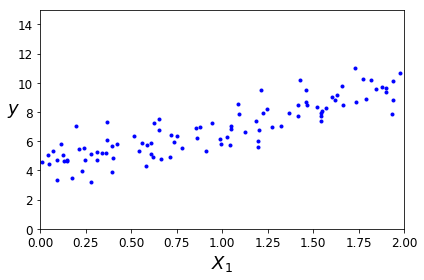

In [3]:
plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 18)  # notice that you can use LaTex here in label as well
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.xlim([0,2])
plt.ylim([0,15])

save_fig('generated_data_plot')

Now let's compute $\hat{\theta} using Normal Equation, using `inv()` function from `np.linalg` (NumPy's Linear Algebra module) to compute inverse of a matrix, and `dot()` method for matrix multiplication:

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function we used to generate data is $ y= 4+3x_0 + \text{Guassian noise}$, let's see what equation found:

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

Ideally you would have $\theta_0 = 4 $ and $\theta_1 = 3 $ instead of $\theta_0 = 4.22 $ and $\theta_1 = 2.77$. However with the noise we add in there, it is impossible to recover the exact parameters of the original function.

Now we can make predictions using $\hat{\theta}$:

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0=1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Plotting model predictions:

Saving figure linear_model_predictions


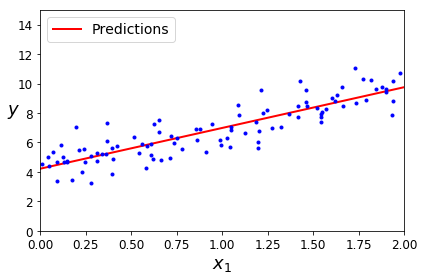

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.xlim([0,2])
plt.ylim([0,15])
save_fig("linear_model_predictions")
plt.show()

Equivalently using Scikit-Learn:

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

Getting the new prediction:

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on `scipy.linalg.lstsq()` function ("least squares"), which we can call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). We can also use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

This means that `LinearRegression` class is based on pseudoinverse, which ultimately relies on the SVD matrix decomposition of $\mathbf{X}$ (see chapter 8 for details about the SVD decomposition). Its time complexity is $O(n^2)$ and it works even when $ m < n$ or when some features are linear combinations of other features ( in these cases, $\mathbf{X}^T\mathbf{X} $ is not invertible so the Normal Equation fails). However, this doest not change the rest of the description of the `LinearRegression` class, in particular, it is based on an analytical solution, it does not scale well withe the number of features, it scales linearly with the number of instances, all the data must fit in memory, it doest not require feature scaling and the order of the instances in the training set doest not matter.

## Gradient Descent

_Gradient Descent_ is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. <br>
See detailed explanation [here](https://en.wikipedia.org/wiki/Gradient_descent).

Also there is a great video created by [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) illustrates how _Gradient Descent_ works.

In [12]:
from IPython.display import HTML
HTML('<iframe width="600" height="400" src="https://www.youtube.com/embed/IHZwWFHWa-w" </iframe>')

__Note__: <br>
When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn's `StandardScaler` class), or else it will take much longer to converge.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit (i.e., _partial derivative_).

In other words, it is like asking "what is the slope of the mountain under my feet if I face east?" and then asking the same question facing north (and so on for all other dimensions).

_Partial derivatives of the cost function of MSE_:

$$ \frac{\partial }{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}(\theta^T\cdot\mathbf{x}^\text{(i)} - y^\text{(i)})\, x_j^\text{(i)}$$

Instead of computing these gradients individually, we can compute all of them in on go. The gradient vector, noted $\nabla_\theta MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter). <br>
See function below:

$$ \nabla_\theta MSE(\theta) = \begin {pmatrix} 
\frac {\partial }{\partial \theta_0}MSE(\theta)  \\ 
\frac {\partial }{\partial \theta_1}MSE(\theta)  \\
\vdots \\
\frac {\partial }{\partial \theta_n}MSE(\theta)
\end {pmatrix} 
= \frac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - \mathbf{y})$$

__Note__: <br>

This formula involves calculations over the full training set $\mathbf{X}$, at __each__ Gradient Descent step! This is why the algorithm is called _Batch Gradient Descent_: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets. However, Gradient Descent scales very well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta\$ to determine the size of the downhill step: 

_Gradient Decent Step Formula_:

$$\theta^\text{(next step)} = \theta -\eta\nabla_\theta MSE(\theta)$$

In [13]:
#set learning rate
eta = 0.1
n_iterations = 1000 
m = 100
theta = np.random.randn(2,1)


for iteration in range(n_iterations):
    # applying gradient vector of cost function
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y)
    
    # applying gradient decent steps
    theta = theta - eta*gradients

    
theta
    

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

This is practically what Normal Equation has found

Now let's visualize impacts of using different learning rate $\eta$:

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:  # plotting first several iterations to illustrate eta
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        
        
        if theta_path is not None:
            theta_path.append(theta)
            
            
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.xlim([0,2])
    plt.ylim([0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


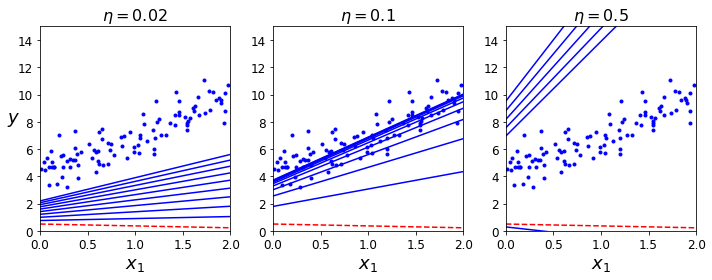

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")

On the left, the learning rate is too slow, the algorithm will eventually reach the solution, but it will take a long time; on the right the learning rate is too high, the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

In order to find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

A simple solution to set number of iterations can be: <br>
Initially we start with a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny -- that is , when its norm becomes smaller than a tiny number $\epsilon$ (called _tolerance_) -- because this happens when Gradient Descent has (almost) reached minimum.

_Note_: <br>
When the cost function is convex and its slope does not change abruptly (as the case for the MSE cost function),  it can be shown that Batch Gradient Descent with a fixed learning rate has a _convergence rate_ of $O(\frac{1}{\text{iterations}})$. In other words, if you divide the tolerance $\epsilon$ by 10 (to have a more precise solution), then the algorithm will have to run about 10 times more iterations.

### Stochastic Gradient Descent

The main problem for Batch Gradient Descent is the fact that it uses the whole training set to compute the gradient at every step, which makes it very slow when the training set is large. At the opposite extreme, _Stochastic Gradient Descent_ just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes the algorithm much faster since it has very little data to manipulate at each iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration. <br>

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent -- Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the __final parameter values are good, but not optimal__. <br>

Therefore, when the cost function is very irregular, this can actually help the algorithm jump out of local minima (i.e., SGD has a better chance of finding the global minimum than BGD does).

#### Learning Schedule

One Solution to finding a global minima for SGD, despite its randomness, is to gradually reduce the learning rate. This process is called _simulated annealing_. The function that determines the learning rate at each iteration is called the _learning schedule_.

If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

See implementation below:

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


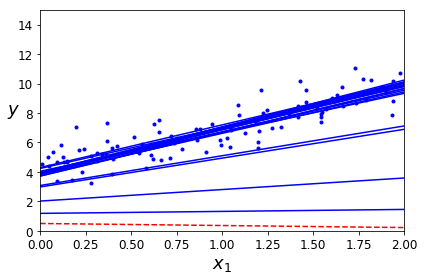

In [18]:
n_epochs = 50
t0, t1 = 5, 50. # setting learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)


theta = np.random.randn(2,1)


for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta) # also visualizing results
            style = 'b-' if i>0 else 'r--'
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)- yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)
        
        
        
        
plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.xlim([0,2])
plt.ylim([0,15])
save_fig('sgd_plot')

Notice that with BGD we iterate over 1,000 times; with SGD, we iterate over ~ 50 times and the results are pretty amazing:

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

This can also be achieved via `SGDRegressor` in Scikit-Learn:

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X,y.ravel())  # y.ravel() is equivalent to y.reshape(-1, order = order)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### Mini-batch Gradient Descent

This basically combines the idea of SGD and BGD -- at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called _mini-batches_. THe main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs. <br>

__Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima__.

See implementation below:

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)

theta = np.random.randn(2,1) # initializing randomly

t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

        
theta

array([[4.25214635],
       [2.7896408 ]])

We can also compare the path they've taken:

Saving figure gradient_descent_paths_plot


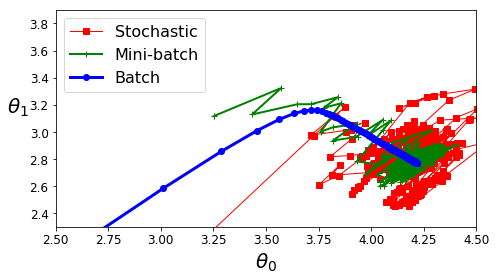

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.xlim([2.5, 4.5])
plt.ylim([2.3,3.9])
save_fig("gradient_descent_paths_plot")

In summary:

|Algorithm| Large $m$| Out-of-core support | Large $n$ | Hyperparams| Scaling required| Scikit-Learn|
|----|----|----|----|----|----|----|
|Normal Equation| Fast | No | Slow | 0 | No | `LinearRegression`|
|Batch GD| Slow |No | Fast | 2 | Yes | n/a|
|Stochastic GD| Fast | Yes | Fast | $\ge2$ | Yes | `SGDRegressor`|
|Mini-batch GD| Fast | Yes | Fast | $\ge2$ | Yes | n/a|

## Polynomial Regression

Polynomial Regression is a way of using linear model to fit nonlinear data -- by adding powers of each feature as new feature, then train a linear model on this extended set of features.

Example:

Saving figure quadratic_data_plot


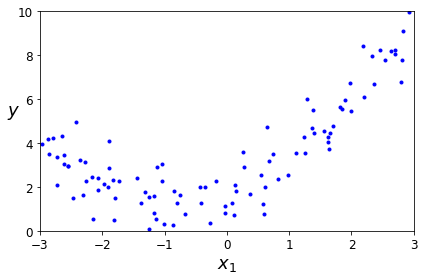

In [24]:
np.random.seed(42)

# generating random numbers
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# visualzing results
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0 , fontsize = 18)
plt.xlim([-3,3])
plt.ylim([0,10])
save_fig('quadratic_data_plot')

### Application using SciKit - Learn

We can use Scikit-Learn's `PolynomialFeatures` class to transform our training data:

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X[0]

array([-0.75275929])

In [26]:
X_poly[0]

array([-0.75275929,  0.56664654])

Now we can fit a `LinearRegression` model to this extended training data:

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The model estimates $\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$; the original function was $ y = 0.5 x_1^2 + x_1 + 2 + \text{Guassian Noise}$ <br>
Pretty Close!

Saving figure quadratic_predictions_plot


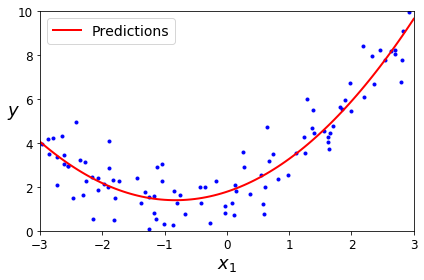

In [28]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.xlim([-3,3])
plt.ylim([0,10])
save_fig("quadratic_predictions_plot")

__Note__: <br>
When there are multiple features, Polynomial regression is capable of finding relationships between features -- this is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. e.g., if there were two features $a$ and $b$, `PolynomialFeatures` with `degree = 3` would not only add the features $a^2$, $a^3$, $b^2$ and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

`PloynomialFeatures(degress = d)` transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ features, where $n!$ is the _factorial_ of $n$, equal to $1\times2\times3\times\ldots\times n$. Beware of the combinatorial explosion of the number of features!

### Learning Curves

We can perform high-degree Polynomial Regression, this will likely fit the training data much better than with plain Linear Regression. However, we will be severely overfitting the training data; while the linear model is underfitting it. In previous example, the quadratic model generalize the best, however in general, we won't be able to know what function generated the data.

See examples below for high-degree Polynomial Regression models:

Saving figure high_degree_polynomials_plot


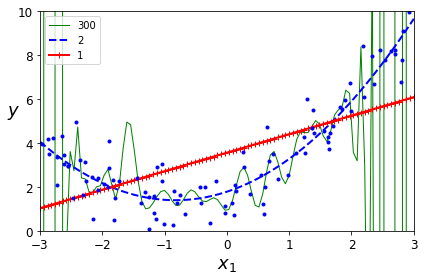

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.xlim([-3,3])
plt.ylim([0,10])
save_fig("high_degree_polynomials_plot")

In order to know whether we are underfitting or overfitting the data, we can use cross-validation to get an estimate of a model's generalization performance. <br>
Another way is to look at the __learning curves__: These are plots of the model's performance on the training set and the validation set as a function of the training set size.

To generate plots, simply train the model several times on different sized subsets of the training set. See example below:

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)      

Saving figure underfitting_learning_curves_plot


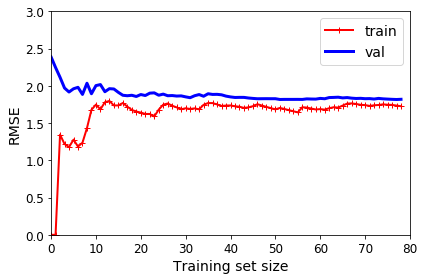

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")      

This illustrates as we add more training data to the model, the RMSE starts to reach a plateau. The same goes to when we apply the model to the validation set. Do note that when the training set size is small, the model is overfitted but not generalized as you can see the polarized dot on RMSE at the start of the curve. These learning curves are typical of an underfitting model. Both curve have reached a plateau; they are close and fairly high. <br>

_Note_: <br>
If the model is underfitting the training data, adding more training examples will not help. We'll have to use a more complex model or come up with better features.

Now let's try a $10^\text{th}$-degree polynomial model on the same data:

Saving figure learning_curves_plot


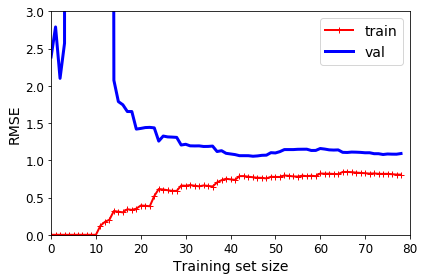

In [32]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot") 

- The error on the training data is much lower than with the Linear Regression model
- THere is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data (i.e., __overfitted__). However, if you used a much larger training set, the two curves would continue to get closer.

_Note_: <br>
One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error (provided you have that much training data to feed).

### The Biase/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors: <br>
- _Bias_: <br>
<br>
    This part of the generalization error is due to __wrong assumptions__, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
<br>
<br>
- _Variance_: <br>
<br>
    This part is due to the model's __excessive sensitivity to small variations in the training data__. A model with many degrees of freedom (e.g., a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
<br>
<br>
- _Irreducible Error_: <br>
<br>
    This part is due to the __nosiness of the data itself__. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).
<br>

Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a tradeoff. 



## Regularized Linear Models

### Ride Regression